In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels
import scipy
import pyreadstat
from utils import standardize

### Simulation of probability models
#### Girls vs boys births
How many girls in 400 births? The probability that a baby is a girl or boy is 48.8% or 51.2%, respectively. Suppose that 400 babies are born in a hospital in a given year. How many will be girls? We can simulate the 400 births using the binomial distribution. To get a sense of the distribution of what could happen, we simulate the process 1000 times:

(40, 60)

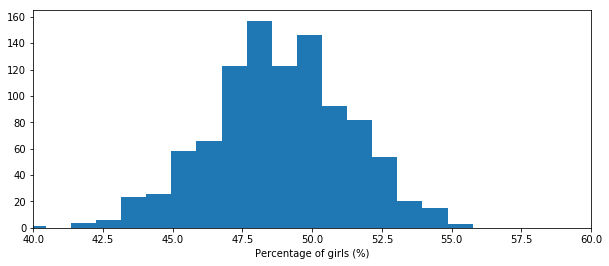

In [2]:
n = 400; p = 0.488
n_sims = 1000
n_girls = np.random.binomial(n=n, p=p, size=n_sims)
n_girls = 100*n_girls/n
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,4))
axes.hist(n_girls, bins=20)
axes.set_xlabel('Percentage of girls (%)');
axes.set_xlim([40, 60])

#### Accounting for twins
We can complicate the model in various ways. For example, there is a 1/125 chance that a birth event results in fraternal twins, of which each has an approximate 49.5% chance of being a girl, and a 1/300 chance of identical twins, which have an approximate 49.5% chance of being girls. We can simulate 400 birth events as follows:

In [3]:
birth_type = np.random.choice(['single', 'identical', 'fraternal'], size=n,  p=[1-1/125-1/300, 1/300, 1/125])
birth_type

array(['single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'fraternal', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single', 'single',
       'single', 'single', 'identical', 'single', 'single', 'single',
       'single', 'single', 'single', 'single', 'single',

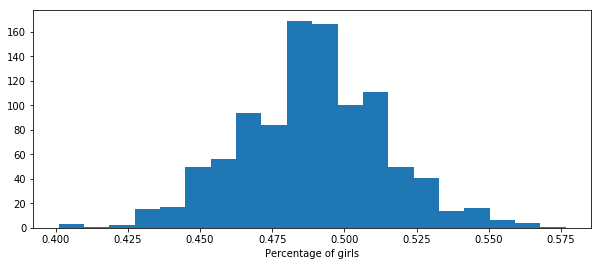

In [4]:
birth_type = np.random.choice(['single', 'identical', 'fraternal'], size=n,  p=[1-1/125-1/300, 1/300, 1/125])
n_sims = 1000
girls_avg = []
for sim in range(n_sims):
    girls = []
    for birth in birth_type:
        if birth == 'single':
            girls.extend(np.random.binomial(n=1, p=0.488, size=1))
        elif birth == 'identical':
            girls.extend(2*np.random.binomial(n=1, p=0.495, size=1))
        elif birth == 'fraternal':
            girls.extend(np.random.binomial(n=1, p=0.495, size=2))
    girls_avg.append(np.mean(girls))

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,4))
axes.hist(girls_avg, bins=20)
axes.set_xlabel('Percentage of girls');
#axes.set_xlim([40, 60])   
    

### Continuous random variables
Similarly, we can program Python to simulate continuous random variables. For example, 52% of adults in the United States are women and 48% are men. The heights of the men are approximately normally distributed with mean 69.1 inches and standard deviation 2.9 inches; women with mean 63.7 and standard deviation 2.7. Suppose we select 10 adults at random. What can we say about their average height?

In [5]:
sex = np.random.binomial(n=1, p=0.52, size=10) # 10 adults at random
height = [np.random.normal(loc=69.1, scale=2.9, size=1)[0] if i==1 
          else np.random.normal(loc=64.5, scale=2.7, size=1)[0] for i in sex]
print('Average height: ' + str(np.round(np.mean(height),2)) + str(' inches.'))

Average height: 66.35 inches.


To simulate the distribution of the average height, we loop the simulation 1000 times. What about the maximum height of 10 people? 

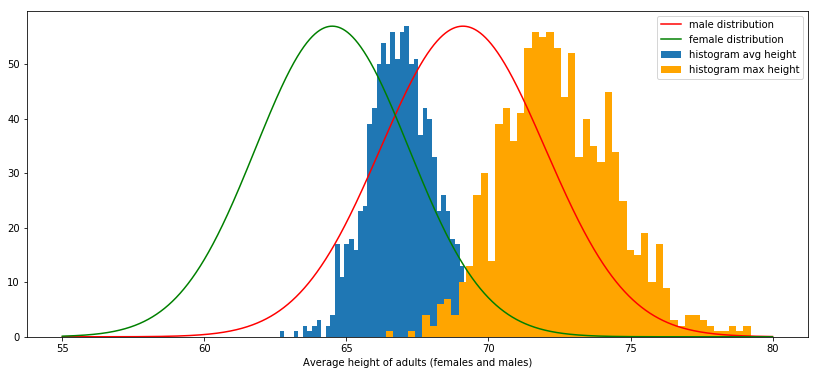

In [6]:
n_sims = 1000
avg_height = []
max_height = []
for sim in range(n_sims):
    sex = np.random.binomial(n=1, p=0.52, size=10) # 10 adults at random
    height = [np.random.normal(loc=69.1, scale=2.9, size=1)[0] if i==1 
          else np.random.normal(loc=64.5, scale=2.7, size=1)[0] for i in sex]
    avg_height.append(np.mean(height))
    max_height.append(np.max(height))

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)    
    
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(14,6))
hist_avg = axes.hist(avg_height, bins=50, label='histogram avg height')
axes.set_xlabel('Average height of adults (females and males)');
axes.plot(np.arange(55,80,0.001), gauss(np.arange(55,80,0.001), 69.1, 2.9, np.max(hist_avg[0])),'r', label='male distribution') # males
axes.plot(np.arange(55,80,0.001), gauss(np.arange(55,80,0.001), 64.5, 2.7, np.max(hist_avg[0])),'g', label='female distribution') # females
hist_max = axes.hist(max_height, bins=50, color='orange',label='histogram max height')
axes.legend()



### Constructing the predictive interval using simulations

$log(earnings) = 8.4 + 0.017·height -0.079·male + 0.007·height·male$ with sd = 0.88

In [7]:
log_earnings = 8.4+0.017*68-0.079*1+0.007*68*1
earnings = np.exp(log_earnings)
log_std_earnings = 0.88
std_earnings = np.exp(log_std_earnings)

print("Point estimate for predicted earnings: " + str(earnings))
print("68% predictive interval: [" + str(earnings/std_earnings) + ' , ' + str(earnings*std_earnings) + ']')
print("95% predictive interval: [" + str(earnings/(2*std_earnings)) + ' , ' + str(earnings*std_earnings**2) + ']')




Point estimate for predicted earnings: 21015.17342828049
68% predictive interval: [8716.734824075582 , 50665.47544854818]
95% predictive interval: [4358.367412037791 , 122149.37988439316]


The simulation prediction is a set of random numbers whose logarithms have mean 9.95 and standard deviation 0.88. 
Draw 1000 random numbers from a normal distribution with mean 9.95 and variance 0.88, and then exponentiate these values.

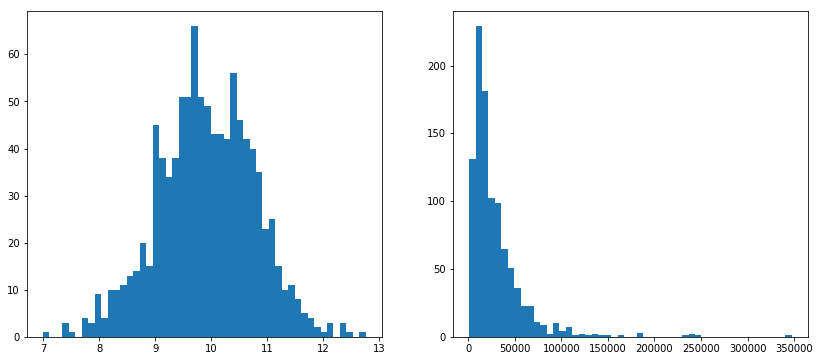

Numerical summaries for original scale
Mean: 28943.43628629148
Quantiles [0.025, 0.975]: [  3558.26008686 101998.5867416 ]
Quantiles [0.25, 0.75]: [11615.28425394 36216.08013314]


In [9]:
log_pred = np.random.normal(loc=9.95, scale=log_std_earnings, size=1000)
pred = np.exp(log_pred)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,6))
axes[0].hist(log_pred, bins=50)
axes[1].hist(pred, bins=50)
plt.show()
print('Numerical summaries for original scale')
print('Mean: ' + str(np.mean(pred)))
print('Quantiles [0.025, 0.975]: ' + str(np.quantile(pred, [0.025, 0.975])))
print('Quantiles [0.25, 0.75]: ' + str(np.quantile(pred, [0.25, 0.75])))




### male vs female earnings
For more general predictions, however, the easiest and most reliable way to com-pute uncertainties is by simulation. For example, suppose we have a 68-inch-tall woman and a 68-inch-tall man, and we would like to use model (4.2) to predict the difference of their earnings. As a point estimate, we can use the difference of the point predictions: exp(8.4+ 0.017 · 68 − 0.079 · 1+ 0.007 · 68 · 1) − exp(8.4+ 0.017 · 68 − 0.079 · 0+ 0.007 · 68 · 0) = 6900. The simplest way to get a standard error or uncertainty interval for this prediction is to use simulation:

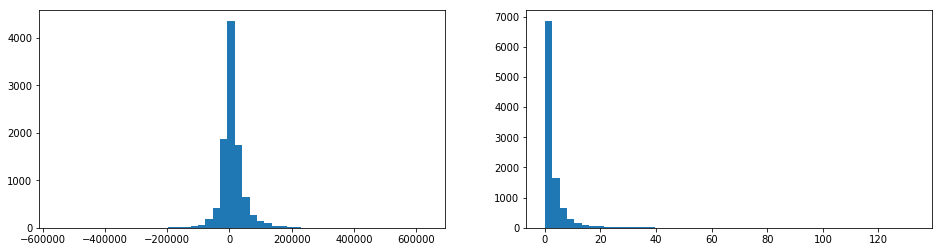

In [10]:
pred_male = np.exp(np.random.normal(loc=8.4+0.017*68-0.079*1+0.007*68*1, scale=0.88, size=10000))
pred_female = np.exp(np.random.normal(loc=8.4+0.017*68-0.079*0+0.007*68*0, scale=0.88, size=10000))
pred_diff = pred_male-pred_female
pred_ratio = pred_male/pred_female
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,4))
axes[0].hist(pred_diff, bins=50)
axes[1].hist(pred_ratio, bins=50)
plt.show()

In [136]:
def sim(model_results, size=10):
    """
    Simulate samples from coefficients of a generalized linear model (analogous to R function sim() from Gelman and Hill).
    The standard deviation of residuals $\hat{\sigma}$ is chi-squared while the model coefficients
    $\hat{beta}$ are normal.
    Both uncertainty in $\hat{\sigma}$ and $\hat{beta}$ is taken into account.
    PARAMETERS:
        model_results : the results object returned from `fit()` method
        size : int the number of simulations to run
    RETURN:
        beta_sim : np.array of shape [size, len(model_results.params)] model's coefficients
        sigma_sim : np.array of shape [size] model's residual standard deviation
    NOTE: TODO: adjust for overdispersion in Poisson regression
    """
    beta_hat = model_results.params
    cov_beta = model_results.cov_params()
    df = model_results.df_resid
    residuals = model_results.resid_response if isinstance(model_results, statsmodels.discrete.discrete_model.BinaryResultsWrapper) else model_results.resid
    sigma_hat = np.sqrt(np.sum(residuals**2) / df)
    V_beta = cov_beta / sigma_hat**2
    X = np.random.chisquare(df, size=size)
    sigma_sim = sigma_hat * np.sqrt(df / X)
    beta_sim = [np.random.multivariate_normal(beta_hat, (sigma_sim[i]**2) * V_beta) for i in range(size)]
    return np.array(beta_sim), np.array(sigma_sim)

## Simulation with logistic regression model (Well switching dataset)

In [125]:
data_folder = 'data/arsenic/'
data_df = pd.read_csv(data_folder + 'wells.dat', sep=" ")
data_df['dist100'] = data_df.dist/100  # transform dist in 100 m

In [126]:
X = sm.add_constant(data_df[['dist100']])
y = data_df.switch
model = sm.Logit(endog=y, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4
deviance: 4076.2, difference with null: 41.9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Oct 2020   Pseudo R-squ.:                 0.01017
Time:                        14:52:09   Log-Likelihood:                -2038.1
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 9.798e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6060      0.060     10.047      0.000       0.488       0.724
dist100       -0.6219      0.097     -6.383      0.000      -0.813      -0.431
==============================================================================
"""

We simulate 1000 models and show them in the parameters space. This gives us a sense of the uncertainty in parameters that are compatible with the data.

/home/andrea/anaconda3/envs/mamba/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '$\\beta_1$')

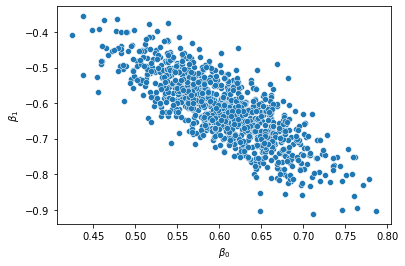

In [137]:
betas_sim, sigma_sim = sim(res, size=1000)
sns.scatterplot(betas_sim[:, 0], betas_sim[:, 1])
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')

We can also simulate 1000 predictions for 10 new samples (in this case just the first 10 data points).

In [138]:
n_sim = 1000
X_tilde = X.iloc[:10, :]
n_tilde = X_tilde.shape[0]
y_tilde = np.ones([n_sim, n_tilde]) * np.nan
for i in range(n_sim):
    p_tilde = scipy.special.expit(X_tilde @ betas_sim[i, :])
    y_tilde[i, :] = np.random.binomial(n=np.ones(n_tilde, dtype=int), p=p_tilde, size=n_tilde)

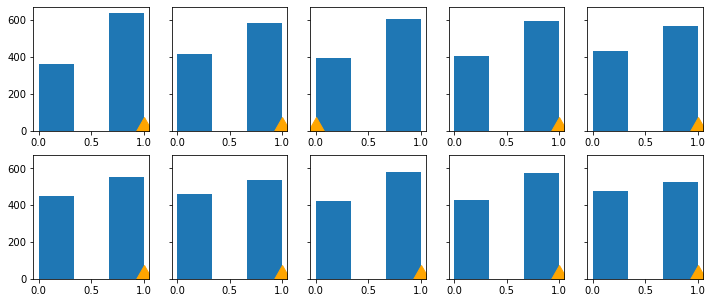

In [139]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=[12,5], sharey=True)

for i in range(10):
    axs[int(i/5), i%5].hist(y_tilde[:, i], bins=3)
    axs[int(i/5), i%5].plot(y.iloc[i], 0, 'd', color='orange', markersize=20)

## Compound model

In [140]:
data_folder = 'data/earnings/'
data_df, meta = pyreadstat.read_dta(data_folder + 'heights.dta')
# remove NaNs
data_df = data_df.dropna()

In [141]:
male = np.abs(data_df.sex - 2)  # converts sex variable into male variable
data_df['male'] = male
Xa = sm.add_constant(data_df[['height', 'male']])  # add ones vector
y = data_df.earn
model = sm.Logit(endog=y>0, exog=Xa)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.358924
         Iterations 8
deviance: 989.9, difference with null: 104.8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   earn   No. Observations:                 1379
Model:                          Logit   Df Residuals:                     1376
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Oct 2020   Pseudo R-squ.:                 0.09569
Time:                        14:57:50   Log-Likelihood:                -494.96
converged:                       True   LL-Null:                       -547.33
Covariance Type:            nonrobust   LLR p-value:                 1.792e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7591      2.069     -1.817      0.069      -7.813       0.295
height         0.0799      0.032      2.483      0.013       0.017       0.143
male           1.7029      0.322      5.285      0.000       1.071       2.334
==============================================================================
"""

In [142]:
data_pos = data_df[data_df.earn>0]
y = np.log(data_pos.earn)  # define dependent variable
Xa_pos = sm.add_constant(data_pos[['height', 'male']])  # add ones vector
model = sm.OLS(y, Xa_pos)  # define model
res_OLS = model.fit()
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     56.34
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           4.21e-24
Time:                        14:57:51   Log-Likelihood:                -1538.7
No. Observations:                1192   AIC:                             3083.
Df Residuals:                    1189   BIC:                             3099.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1527      0.603     13.530      0.000       6.970       9.335
height         0.0207      0.009      2.218      0.027       0.002       0.039
male           0.4232      0.072      5.841      0.000       0.281       0.565
==============================================================================
Omnibus:                      225.577   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.608
Skew:                          -1.088   Prob(JB):                    3.52e-101
Kurtosis:                       5.141   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can simulate the predicitons for a new data point. For example a 68 inches tall woman.

In [143]:
X_tilde = np.array([1, 68, 0])[np.newaxis, :]
n_tilde = X_tilde.shape[0]
earnpos_tilde = np.ones([n_sim, n_tilde]) * np.nan
earning_tilde = np.ones([n_sim, n_tilde]) * np.nan
beta_sim1a, sigma_sim1a = sim(res, size=1000)
beta_sim1b, sigma_sim1b = sim(res_OLS, size=1000)

In [144]:
for i in range(n_sim):
    p_tilde_pos = scipy.special.expit(X_tilde @ beta_sim1a[i, :])
    earnpos_tilde[i, :] = np.random.binomial(n=np.ones(n_tilde, dtype=int), p=p_tilde_pos, size=n_tilde)
    if earnpos_tilde[i, :] == 0:
        earning_tilde[i, :] = 0
    else:
        earning_tilde[i, :] = np.random.normal(loc=X_tilde @ beta_sim1b[i, :], scale=sigma_sim1b[i], size=n_tilde)
        


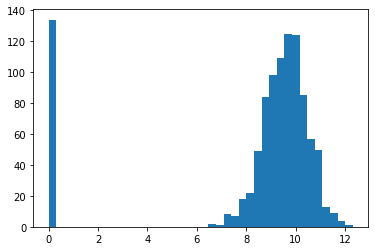

In [145]:
fig, ax = plt.subplots()
ax.hist(earning_tilde, bins=40);